In [1]:
%matplotlib inline
from numpy import array, arange, exp, log, linspace
from numpy.random import normal, random
import lmfit
from sklearn import cross_validation
import seaborn as sns
sns.set_style('ticks')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Underlying function

$$
f(t) = b e^{a t} \\
g(t) = b^{at}
$$

In [2]:
def f(t,a,b):
    return b*exp(-a*t)

In [3]:
def g(t,a,b):
    return b**(a*t)

## Generate data

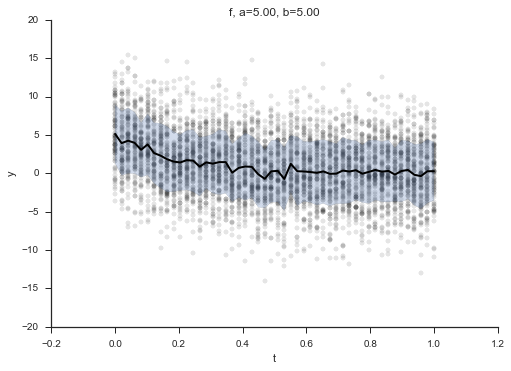

In [4]:
N = 100
t = linspace(0,1)
sig = 2
a,b = 5,5
data = array([f(t, a, b) + normal(0, sig**2, len(t)) for _ in range(N)])
avg = data.mean(axis=0)
sd = data.std(axis=0, ddof=1)
for y in data:
    scatter(t, y, color='k', alpha=0.1, marker='o')
fill_between(t, avg-sd, avg+sd, alpha=0.25)
plot(t, avg, color='k', lw=2)
title("f, a=%.2f, b=%.2f" % (a,b))
xlabel('t')
ylabel('y')
sns.despine()

## Model fitting

[[Model]]
    Model(f)
[[Fit Statistics]]
    # function evals   = 16
    # data points      = 50
    # variables        = 2
    chi-square         = 8.101
    reduced chi-square = 0.169
[[Variables]]
    a:   5.22585174 +/- 0.374737 (7.17%) (init= 1)
    b:   5.03812494 +/- 0.242209 (4.81%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      =  0.669 


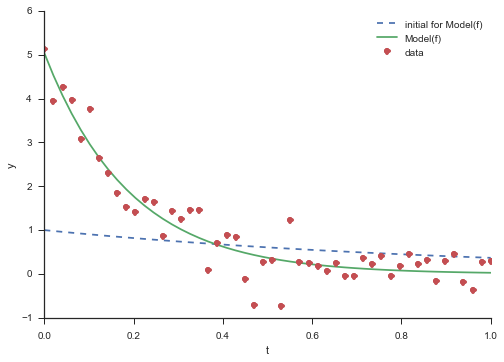

In [5]:
model = lmfit.Model(f)
params = model.make_params(a=1,b=1)

ffit = model.fit(avg, t=t, params=params)
print ffit.fit_report()
ffit.plot_fit()
sns.despine()

[[Model]]
    Model(g)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 50
    # variables        = 2
    chi-square         = 77.206
    reduced chi-square = 1.608
[[Variables]]
    a:   0.45969564 +/- 5.70e+06 (1239765152.84%) (init= 1)
    b:   0.08018864 +/- 2.48e+06 (3095810320.69%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      =  1.000 


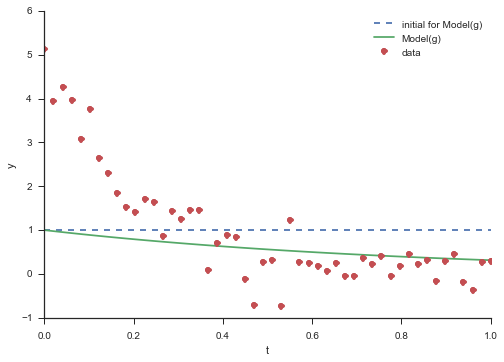

In [6]:
model = lmfit.Model(g)
params = model.make_params(a=1,b=1)

gfit = model.fit(avg, t=t, params=params)
print gfit.fit_report()
gfit.plot_fit()
sns.despine()

## [Cross-valiation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [7]:
model = lmfit.Model(f)
params = model.make_params(a=0,b=1)
loocv = cross_validation.LeaveOneOut(N)
fscore = 0
for train_index, test_index in loocv:
    train, test = data[train_index,:], data[test_index,:]
    fit = model.fit(train.mean(axis=0), t=t, params=params)
    _a,_b = fit.best_values['a'],fit.best_values['b']
    fscore += ((test[0,:] - f(t, _a, _b))**2).sum()
fscore /= float(len(t) * (N-1))
print fscore

16.1754690489


In [8]:
model = lmfit.Model(g)
params = model.make_params(a=0,b=1)
loocv = cross_validation.LeaveOneOut(N)
gscore = 0
for train_index, test_index in loocv:
    train, test = data[train_index,:], data[test_index,:]
    fit = model.fit(train.mean(axis=0), t=t, params=params)
    _a,_b = fit.best_values['a'],fit.best_values['b']
    gscore += ((test[0,:] - g(t, _a, _b))**2).sum()
gscore /= float(len(t) * (N-1))
print gscore

17.8122836437


In [9]:
fscore / gscore

0.90810753816950618